<a href="https://colab.research.google.com/github/Gaoshu-root/Code-related-courses/blob/main/mathematics-modeling_%20Notes/%E3%80%8A%E6%95%B0%E5%AD%A6%E5%BB%BA%E6%A8%A1%E3%80%8B_%E5%8D%8E%E4%B8%AD%E5%86%9C%E4%B8%9A%E5%A4%A7%E5%AD%A6%20%E7%AC%AC%2016%20%E6%AC%A1%E5%BC%80%E8%AF%BE/%E7%AC%AC%20%E5%9B%9B%20%E8%AE%B2%20%E4%BC%98%E5%8C%96%E5%BB%BA%E6%A8%A1/4.10%20%E6%95%8F%E6%84%9F%E6%80%A7%E5%88%86%E6%9E%90%20%E3%80%94%20pulp%E3%80%81scipy.optimize.linprog%E3%80%95%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

链接： [《数学建模》_华中农业大学 第 16 次开课](https://www.icourse163.org/learn/HZAU-1001658002?tid=1472021457#/learn/content)

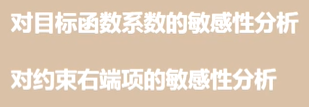

对目标函数系数作敏感性分析，目的是得到**最优解不变时单个目标函数系数变化时的变化范围。**

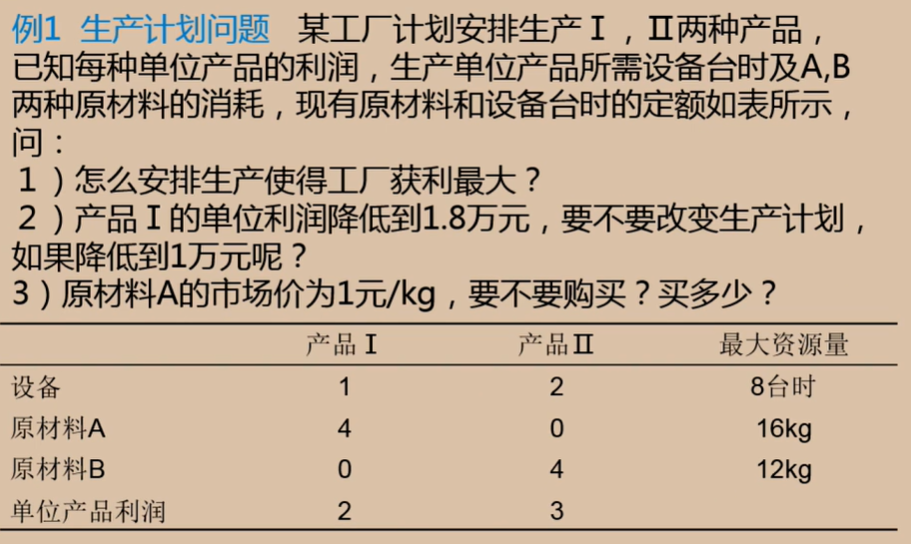

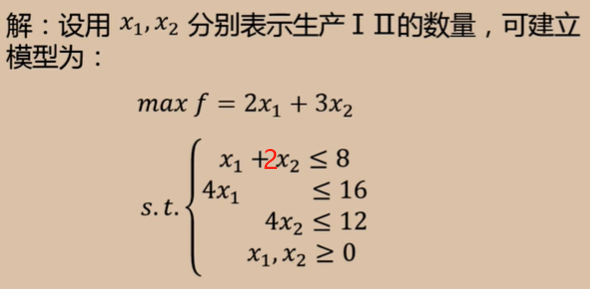

**(1) 如何安排生产可以使得工厂获利最大？**

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html#scipy.optimize.linprog

from scipy.optimize import linprog

# 目标函数： 最小化
# 约束为： ≤ 形式的不等式 或 等式

c = [-2, -3] # 目标函数的参数系数
A = [[1, 2],
    [4, 0],
    [0, 4]]  # 约束中 等式或不等式 的参数系数
b = [8, 16, 12]
xi_bounds = (0, None)
res = linprog(c, A_ub=A, b_ub=b, bounds=[xi_bounds]*2, integrality=1)  # 要求参数为整数
print("工厂的最大利润为：", -res.fun) # 目标的最小值 res.fun
print("最优解 x =", res.x)
print("是否优化成功：", res.message)
print(res.ineqlin)  # 输出的列表 和 约束一一对应

工厂的最大利润为： 14.0
最优解 x = [4. 2.]
是否优化成功： Optimization terminated successfully. (HiGHS Status 7: Optimal)
  residual: [ 0.000e+00  0.000e+00  4.000e+00]
 marginals: [ 0.000e+00  0.000e+00  0.000e+00]


由输出，第 3 个不等式约束的 <font color=blue>residual</font>  是 4，我们可以在**不影响最优解**的情况下将第 3 个约束的右侧减小 4。

<font color=blue>让工厂**获利最大的生产计划**为： 生产 4 单位产品 I 和 2 单位产品 II。

**(2) 产品 I 的单位获利降低到 1.8 万元，要不要改变生产计划，如果降低到 1 万元呢？**

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html#scipy.optimize.linprog

from scipy.optimize import linprog

# 目标函数： 最小化
# 约束为： ≤ 形式的不等式 或 等式

c = [-1.8, -3] # 目标函数的参数系数  修改 [-2, -3] ——> [-1.8, -3]
A = [[1, 2],
    [4, 0],
    [0, 4]]  # 约束中 等式或不等式 的参数系数
b = [8, 16, 12]
xi_bounds = (0, None)
res = linprog(c, A_ub=A, b_ub=b, bounds=[xi_bounds]*2, integrality=1)  # 要求参数为整数
print("工厂的最大利润为：", -res.fun) # 目标的最小值 res.fun
print("最优解 x =", res.x)
print("是否优化成功：", res.message)
print(res.ineqlin)  # 输出的列表 和 约束一一对应

工厂的最大利润为： 13.2
最优解 x = [4. 2.]
是否优化成功： Optimization terminated successfully. (HiGHS Status 7: Optimal)
  residual: [ 0.000e+00  0.000e+00  4.000e+00]
 marginals: [ 0.000e+00  0.000e+00  0.000e+00]


<font color=blue>**产品 I 的单位获利降低到 1.8 万元**时，最优解并没有变化，但最大利润没之前高了。此时**无需改变生产计划**。

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html#scipy.optimize.linprog

from scipy.optimize import linprog

# 目标函数： 最小化
# 约束为： ≤ 形式的不等式 或 等式

c = [-1, -3] # 目标函数的参数系数  修改 [-2, -3] ——> [-1, -3]
A = [[1, 2],
    [4, 0],
    [0, 4]]  # 约束中 等式或不等式 的参数系数
b = [8, 16, 12]
xi_bounds = (0, None)
res = linprog(c, A_ub=A, b_ub=b, bounds=[xi_bounds]*2, integrality=1)  # 要求参数为整数
print("工厂的最大利润为：", -res.fun) # 目标的最小值 res.fun
print("最优解 x =", res.x)
print("是否优化成功：", res.message)
print(res.ineqlin)  # 输出的列表 和 约束一一对应

工厂的最大利润为： 11.0
最优解 x = [2. 3.]
是否优化成功： Optimization terminated successfully. (HiGHS Status 7: Optimal)
  residual: [ 0.000e+00  8.000e+00  0.000e+00]
 marginals: [ 0.000e+00  0.000e+00  0.000e+00]


<font color=blue>**产品 I 的单位获利降低到 1 万元**时，最优解发生变化。此时**需要将生产计划改为： 生产 2 单位产品 I 和 3 单位产品 II**。

**(3) 原材料 A 的市场价为 1 元/kg，要不要购买？买多少？**

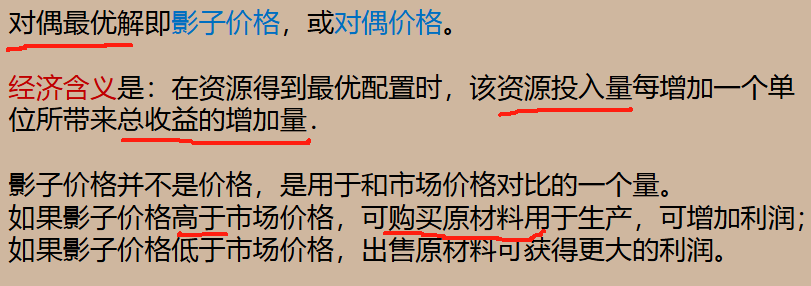

[补充部分的参考链接](https://blog.csdn.net/qq_41698317/article/details/142631078)

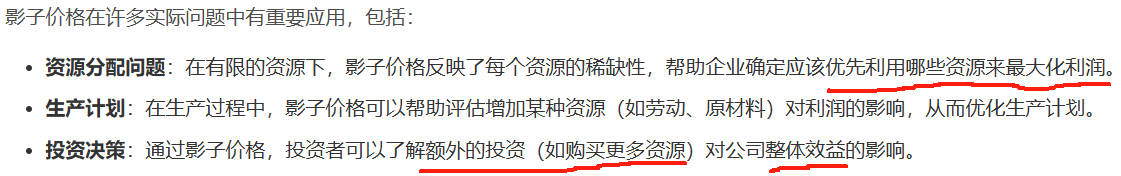

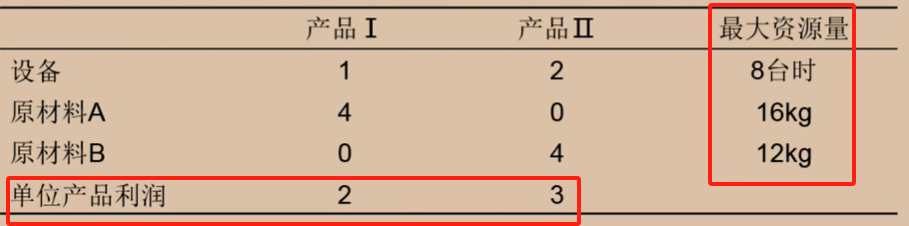

引入对偶变量 $y_1,~y_2,~y_3$，分别表示设备，原材料 A，原材料 B 的**影子价格** <font color=blue>〔增加 **1 单位的相应资源**带来的**收益**〕。

对偶问题的**目标函数**：最小化资源的总成本 $~~8y_1+16y_2+12y_3~~~$<font color=blue>最大资源量 那一列</font>

**约束条件**：

产品 I 的约束： $y_1+4y_2\geq2$


产品 II 的约束： $2y_1+4y_3\geq3$

非负性约束： $y_i\geq0,~~i=1,2,3$


In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html#scipy.optimize.linprog

from scipy.optimize import linprog

# 目标函数： 最小化
# 约束为： ≤ 形式的不等式 或 等式

c = [8, 16, 12] # 目标函数的参数系数
A = [[-1, -4, 0],
    [-2, 0, -4]]  # 约束中 等式或不等式 的参数系数
b = [-2, -3]
xi_bounds = (0, None)
res = linprog(c, A_ub=A, b_ub=b, bounds=[xi_bounds]*3)  # , integrality=1 要求参数为整数
print("最低总成本为：", res.fun) # 目标的最小值 res.fun
print("最优解 x =", res.x)
print("是否优化成功：", res.message)
print(res.ineqlin)  # 输出的列表 和 约束一一对应

最低总成本为： 14.0
最优解 x = [1.5   0.125 0.   ]
是否优化成功： Optimization terminated successfully. (HiGHS Status 7: Optimal)
  residual: [ 0.000e+00  0.000e+00]
 marginals: [-4.000e+00 -2.000e+00]


<font color=blue>原材料 A 的影子价格 0.125 **低于** 其当前的市场价格为 1 元/kg，**不要购入原材料 A**，因为会亏损。

### 用 pulp 进行敏感性分析

In [ ]:
# https://coin-or.github.io/pulp/main/index.html

# !pip install pulp

from pulp import *
import numpy as np

def solve_lp():
  problem = LpProblem("生产计划问题", LpMaximize)
  x1 = LpVariable("产品 I 的产量 x1", lowBound=0)
  x2 = LpVariable("产品 II 的产量 x2", lowBound=0)
  problem += 2 * x1 + 3 * x2, "总利润"  # 目标函数
  # 约束
  problem += x1 + 2 * x2 <= 8, "设备约束"
  problem += 4 * x1 <= 16, "原材料A约束"  # 字典名称不能有空格
  problem += 4 * x2 <= 12, "原材料B约束"
  problem.solve()
  print("求解状态:", LpStatus[problem.status])

  # 优化的参数
  for v in problem.variables()[::-1]:  # 正序输出 决策变量的值 默认是逆序输出
      print(v.name, "=", v.varValue)

  print("最大利润 = ", value(problem.objective))
  return problem

def sensitivity_analysis(problem):
  A_shadow_price = problem.constraints['原材料A约束'].pi
  B_shadow_price = problem.constraints['原材料B约束'].pi
  print("\n敏感性分析 (Sensitivity Analysis):")
  print(f"原材料 A 约束: Shadow Price = {A_shadow_price}")
  print(f"原材料 B 约束: Shadow Price = {B_shadow_price}")

problem = solve_lp()
sensitivity_analysis(problem)

求解状态: Optimal
产品_I_的产量_x1 = 4.0
产品_II_的产量_x2 = 2.0
最大利润 =  14.0

敏感性分析 (Sensitivity Analysis):
原材料 A 约束: Shadow Price = 0.125
原材料 B 约束: Shadow Price = -0.0


#### ⭐ 不管影子价格，直接将买或卖的数量作为参数加入规划

In [ ]:
# https://coin-or.github.io/pulp/main/index.html

# !pip install pulp

import pulp

# 定义问题
problem = pulp.LpProblem("Maximize_Profit", pulp.LpMaximize)

# 定义变量
x1 = pulp.LpVariable("产品 I 的产量 x1", lowBound=0, cat='Continuous')
x2 = pulp.LpVariable("产品 II 的产量 x2", lowBound=0, cat='Continuous')

A_buy = pulp.LpVariable("购买原材料 A 的数量", lowBound=0, cat='Continuous')
A_sell = pulp.LpVariable("卖出原材料 A 的数量", lowBound=0, cat='Continuous')

# 目标函数：最大化利润
problem += 2 * x1 + 3 * x2 - 1 * (A_buy - A_sell)  # 增加 通过买或卖 原料料 A 获取的利润部分

# 约束条件
problem += x1 + 2 * x2 <= 8, "设备约束"
problem += 4 * x1 - A_buy + A_sell <= 16, "原材料A约束"  # 字典名称不能有空格 这里需要修改  注意符号 原材料 A 的总量将变成 16 + A_buy - A_sell
problem += 4 * x2 <= 12, "原材料B约束"

# 求解问题
problem.solve()

# 输出结果
print("求解状态:", LpStatus[problem.status])

# 优化的参数
for v in problem.variables()[::-1]:  # 正序输出 决策变量的值 默认是逆序输出
    print(v.name, "=", v.varValue)

print("最大利润 = ", value(problem.objective))

求解状态: Optimal
购买原材料_A_的数量 = 0.0
卖出原材料_A_的数量 = 16.0
产品_I_的产量_x1 = 0.0
产品_II_的产量_x2 = 3.0
最大利润 =  25.0


## 补充： 相关库的文档整理

### sensitivity

https://nickderobertis.github.io/sensitivity/auto_examples/sensitivity_analysis.html

**敏感性分析 (Sensitivity Analysis)** 是将**不同的输入** 传递给模型以查看**输出如何变化**的过程。

它与蒙特卡罗模拟的不同之处在于，没有将概率分布分配给输入，并且**通常选择较大范围的输入**。

敏感性分析的目的是了解在**整个可能的输入范围内输出是如何变化的**。敏感性分析不导出任何预期结果或结果的概率分布，而是返回与每组输入相关联的**可能输出值的范围**。

In [ ]:
import pandas as pd

def my_model(x_1, x_2):
    """
    Represents f from above
    """
    return x_1 ** x_2

In [ ]:
y = my_model(2, 4)
y

16

In [ ]:
x1_values = [10, 20, 30]
x2_values = [1, 2, 3]

for x1 in x1_values:
    for x2 in x2_values:
        print(x1, x2)

10 1
10 2
10 3
20 1
20 2
20 3
30 1
30 2
30 3


In [ ]:
for x1 in x1_values:
    for x2 in x2_values:
        y_i = my_model(x1, x2)
        print(y_i)

10
100
1000
20
400
8000
30
900
27000


In [ ]:
outputs = []
for x1 in x1_values:
    for x2 in x2_values:
        y_i = my_model(x1, x2)
        outputs.append((x1, x2, y_i))
outputs

[(10, 1, 10),
 (10, 2, 100),
 (10, 3, 1000),
 (20, 1, 20),
 (20, 2, 400),
 (20, 3, 8000),
 (30, 1, 30),
 (30, 2, 900),
 (30, 3, 27000)]

In [ ]:
df = pd.DataFrame(outputs, columns=['x_1', 'x_2', 'y'])
df

,x_1,x_2,y
0,10,1,10
1,10,2,100
2,10,3,1000
3,20,1,20
4,20,2,400
5,20,3,8000
6,30,1,30
7,30,2,900
8,30,3,27000


In [ ]:
df.style.background_gradient(subset='y', cmap='RdYlGn')

,x_1,x_2,y
0,10,1,10
1,10,2,100
2,10,3,1000
3,20,1,20
4,20,2,400
5,20,3,8000
6,30,1,30
7,30,2,900
8,30,3,27000


<Axes: xlabel='x_1', ylabel='x_2'>

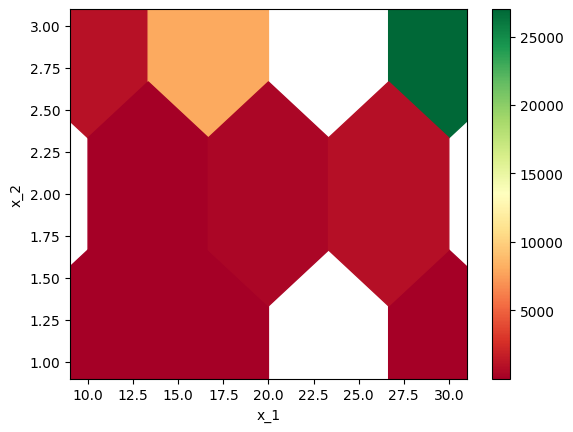

In [ ]:
df.plot.hexbin(x='x_1', y='x_2', C='y', gridsize=3, cmap='RdYlGn', sharex=False)

### 使用 sensitivity.SensitivityAnalyzer 进行敏感性分析

In [ ]:
!pip install sensitivity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.0 MB/s eta 0:00:00


In [ ]:
# https://nickderobertis.github.io/sensitivity/auto_examples/sensitivity_analysis.html

# !pip install sensitivity

from sensitivity import SensitivityAnalyzer

def my_model(x_1, x_2):
    """
    Represents f from above
    """
    return x_1 ** x_2

sensitivity_dict = {
    'x_1': [10, 20, 30],
    'x_2': [1, 2, 3]
}

sa = SensitivityAnalyzer(sensitivity_dict, my_model)


100%|██████████| 9/9 [00:00<00:00, 897.11it/s]


In [ ]:
sa.df

,x_1,x_2,Result
0,10,1,10
1,10,2,100
2,10,3,1000
3,20,1,20
4,20,2,400
5,20,3,8000
6,30,1,30
7,30,2,900
8,30,3,27000


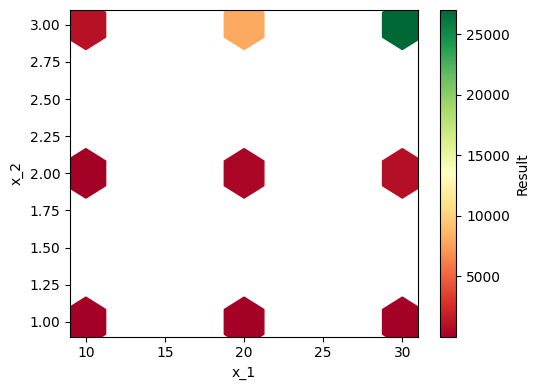

In [ ]:
plot = sa.plot()

# styled = sa.styled_dfs()

100%|██████████| 9/9 [00:00<00:00, 670.62it/s]


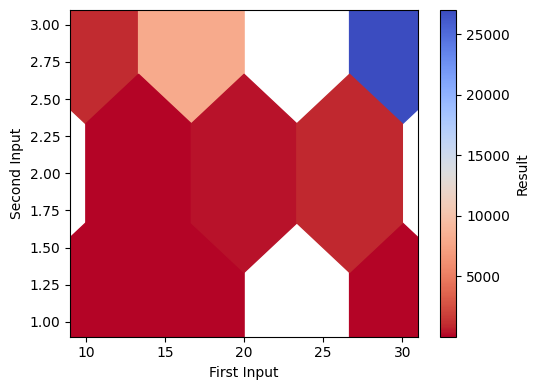

In [ ]:
labels = {
    'x_1': 'First Input',
    'x_2': 'Second Input'
}

sa = SensitivityAnalyzer(
    sensitivity_dict, my_model, grid_size=3, reverse_colors=True, color_map='coolwarm', labels=labels
)
plot = sa.plot()

# styled = sa.styled_dfs()

100%|██████████| 27/27 [00:00<00:00, 514.34it/s]


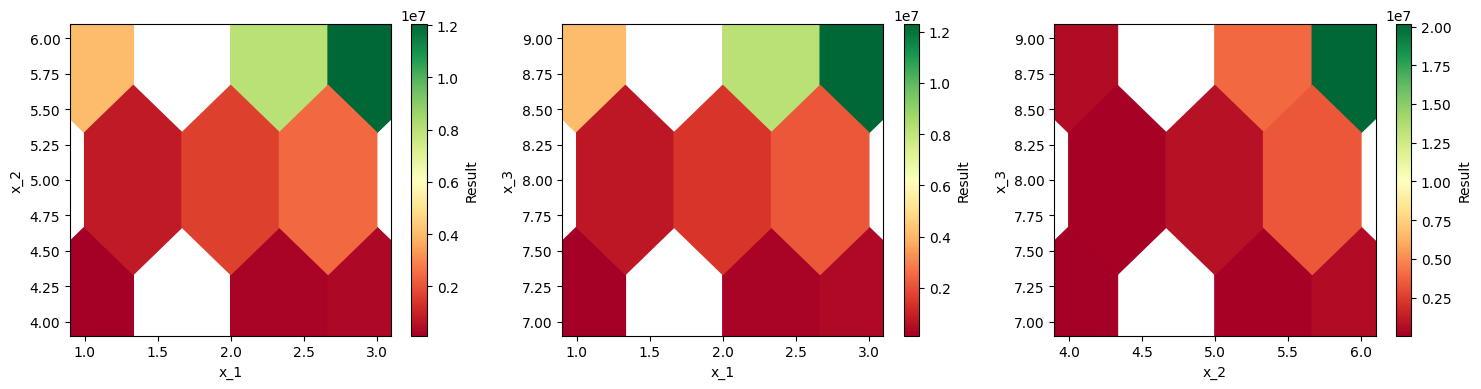

In [ ]:
def my_model_2(x_1, x_2, x_3):
    return x_1 * x_2 ** x_3

sensitivity_dict = {
    'x_1': [1, 2, 3],
    'x_2': [4, 5, 6],
    'x_3': [7, 8, 9]
}

sa = SensitivityAnalyzer(sensitivity_dict, my_model_2, grid_size=3)

plot = sa.plot()

# styled_dict = sa.styled_dfs()